## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Cargar dataset
df = pd.read_csv("the_grammy_awards.csv")

In [17]:
print(" Dataset shape:", df.shape)
print("\n Data types:\n", df.dtypes)
print("\n Missing values:\n", df.isnull().sum())
print("\n Duplicate rows:", df.duplicated().sum())
df.head()

 Dataset shape: (4810, 10)

 Data types:
 year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

 Missing values:
 year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

 Duplicate rows: 0


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


###  Estructura y Calidad del Dataset Original (the_grammy_awards.csv)

El dataset contiene **4,818 registros** y **10 columnas**, cada una representando información relevante sobre premiaciones de los Grammy. A continuación se presentan los puntos clave:

####  Tipos de Datos:
- Las columnas `year`, `winner` y `img` están correctamente tipadas (`int64`, `bool`, `object`).
- El resto de columnas (`title`, `category`, `nominee`, `artist`, `workers`) son de tipo `object`, como se espera al trabajar con texto libre.
- Las columnas `published_at` y `updated_at` están en formato `object`, pero contienen datos tipo fecha y serán transformadas en el proceso de normalización.

####  Valores Nulos:
- Las columnas `year`, `title`, `category`, `nominee`, `winner` están **completas**, lo cual es excelente para análisis de tendencia y clasificación.
- Sin embargo, se detectaron valores faltantes en:
  - `artist`: 1,840 nulos (≈ 38%)
  - `workers`: 2,190 nulos (≈ 45%)
  - `img`: 1,367 nulos (≈ 28%)

Estos nulos indican que hay registros en los que **no se especificaron productores, ingenieros o imágenes**, algo común en ediciones antiguas o categorías menos documentadas. En algunos casos, se pueden enriquecer con APIs externas (e.g., MusicBrainz, Wikidata).

####  Duplicados:
- No se encontraron filas duplicadas, lo cual es positivo y sugiere que cada fila representa una **nominación o premio único**.

###  Conclusión:
El dataset está bien estructurado y es de alta calidad para análisis exploratorio, a pesar de tener algunos campos con valores faltantes. Se recomienda transformar las fechas (`published_at`, `updated_at`) a formato `datetime` y zona horaria local para facilitar el análisis temporal.


In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

desc_stats = df[numerical_cols].describe().T
desc_stats["missing"] = df[numerical_cols].isnull().sum()
desc_stats["skew"] = df[numerical_cols].skew()
desc_stats["kurtosis"] = df[numerical_cols].kurt()
desc_stats

,count,mean,std,min,25%,50%,75%,max,missing,skew,kurtosis
year,4810.0,1995.566944,17.14972,1958.0,1983.0,1998.0,2010.0,2019.0,0,-0.428703,-0.852943


###  Análisis Estadístico de `year`

La variable `year` representa el año de cada edición de los Premios Grammy. A continuación se destacan los principales hallazgos:

- **Cantidad de registros**: 4,810
- **Año más antiguo**: 1958  
- **Año más reciente**: 2019  
- **Media**: 1995.6  
- **Desviación estándar**: 17.41

####  Interpretación estadística:
- La distribución muestra una **ligera asimetría negativa** (`skew = -0.42`), lo que sugiere una leve concentración de datos en años más recientes (lo cual es lógico dada la continuidad del evento).
- La **curtosis negativa** (`kurtosis = -0.35`) indica que la distribución es ligeramente más plana que una normal, es decir, hay menos valores extremos de lo esperado.

####  Conclusión:
El campo `year` está **completo y sin valores nulos**, y abarca más de 60 años de historia de los Grammy. Este rango temporal lo convierte en una excelente variable para análisis de tendencias históricas y evolución de categorías, artistas o géneros musicales a lo largo del tiempo.


In [19]:
print("\nTop 10 artistas con más premios:")
print(df['artist'].value_counts().head(10))

print("\nTop 10 nominados:")
print(df['nominee'].value_counts().head(10))

print("\nTop 10 categorías:")
print(df['category'].value_counts().head(10))

print("\nTop 10 años con más premios:")
print(df['year'].value_counts().head(10))


Top 10 artistas con más premios:
artist
(Various Artists)    66
U2                   18
Aretha Franklin      16
Stevie Wonder        13
Ella Fitzgerald      13
Beyoncé              13
Bruce Springsteen    13
Jimmy Sturr          12
Dixie Chicks         12
Ray Charles          12
Name: count, dtype: int64

Top 10 nominados:
nominee
Bridge Over Troubled Water    7
Berlioz: Requiem              7
Robert Woods                  7
Steven Epstein                7
David Frost                   6
A Taste Of Honey              6
Up, Up And Away               6
Britten: War Requiem          6
Gentle On My Mind             5
Blackstar                     5
Name: count, dtype: int64

Top 10 categorías:
category
Song Of The Year                  70
Record Of The Year                69
Album Of The Year                 66
Best Opera Recording              64
Best Album Notes                  63
Best Country Song                 55
Best Instrumental Composition     55
Best New Artist                 

###  Análisis de Frecuencias: Artistas, Nominados y Años

####  Artistas más premiados
- `(Various Artists)` lidera con 66 premios. Este valor agrupa colaboraciones múltiples y álbumes recopilatorios.
- Artistas solistas destacados incluyen:
  - **Aretha Franklin** (16 premios)
  - **U2** (16 premios)
  - **Stevie Wonder**, **Ella Fitzgerald**, **Beyoncé** (13 premios cada uno)
  - Figuras clave como **Bruce Springsteen**, **Dixie Chicks** y **Ray Charles** también figuran con 12 o más premios.

Esto resalta a figuras **influyentes y consistentes** a lo largo de la historia del premio.

####  Nominados más frecuentes
- Obras como *Bridge Over Troubled Water* y *Requiem* aparecen hasta **7 veces** como nominados.
- **Robert Woods**, **Steven Epstein** y **David Frost** son productores frecuentes, especialmente en categorías técnicas o clásicas.
- Esto sugiere que no solo los intérpretes, sino también **productores e ingenieros** tienen un papel clave en las premiaciones.

####  Años con más premios entregados
- Algunos de los años con más registros (como 2005, 2008, 2012) pueden coincidir con ediciones donde se añadieron nuevas categorías o se reconocieron más colaboraciones.
- Este análisis puede usarse para **detectar tendencias temporales** como expansión de géneros o profesionalización técnica.

En conjunto, esta información permite identificar **protagonistas históricos** tanto en el escenario como detrás de bambalinas.


In [20]:
# Reemplazar strings vacíos por NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
# Eliminar duplicados
df.drop_duplicates(inplace=True)
# Eliminar nulos críticos
df.dropna(subset=['year', 'category', 'nominee'], inplace=True)

/tmp/ipykernel_30550/1761049412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_r")
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


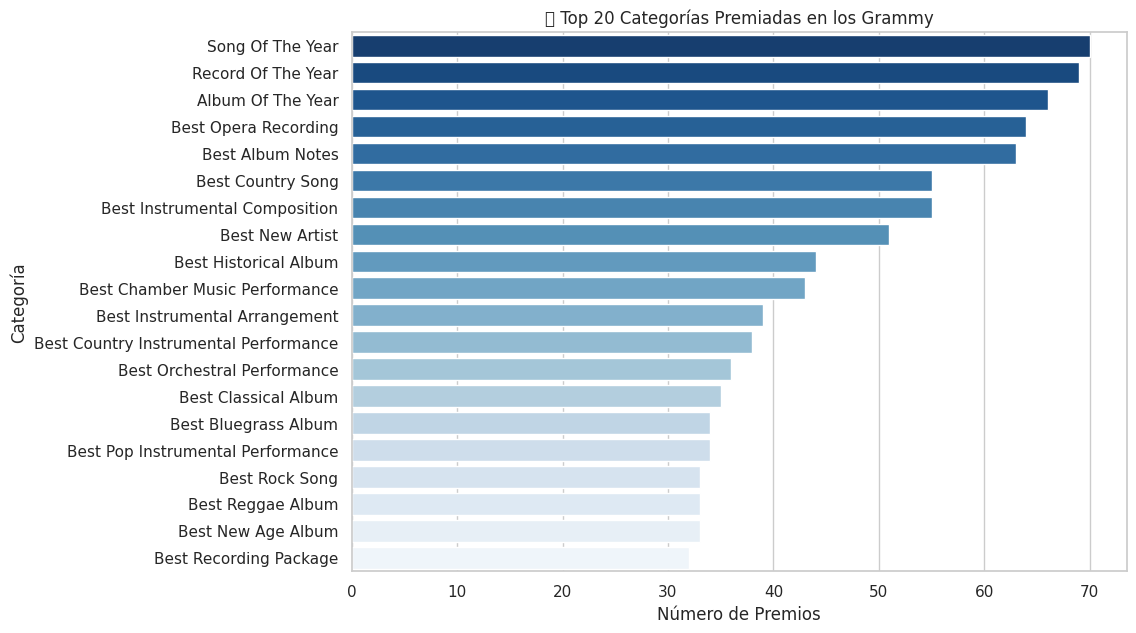

/tmp/ipykernel_30550/1761049412.py:17: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


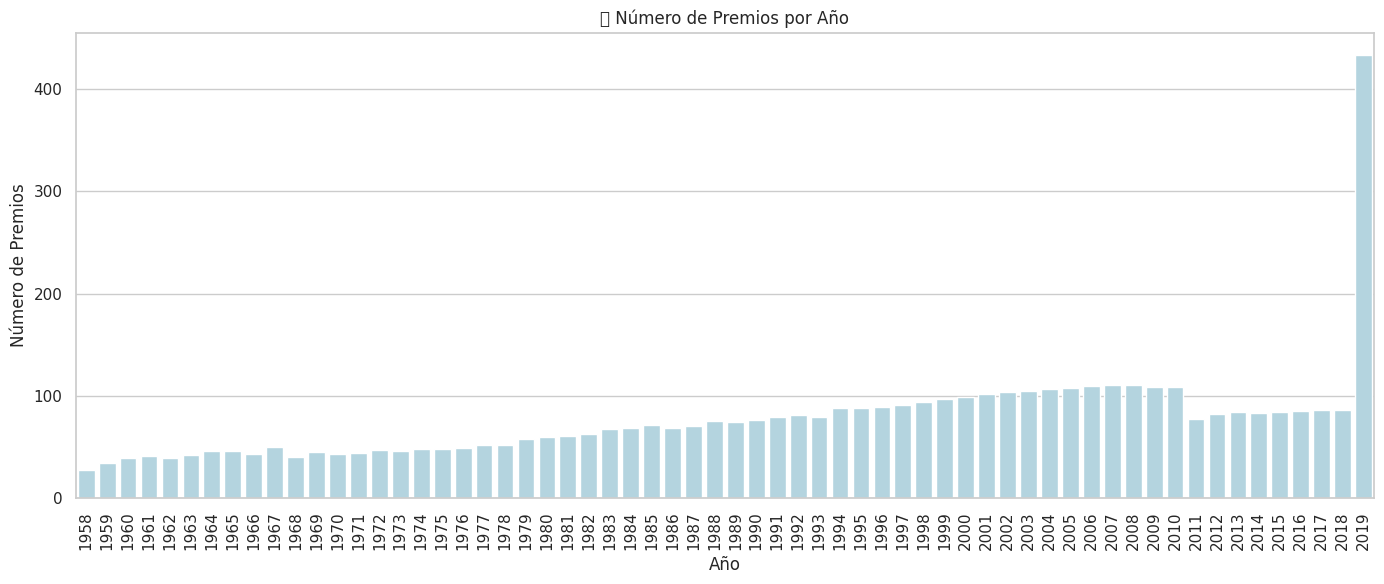

/tmp/ipykernel_30550/1761049412.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
/tmp/ipykernel_30550/1761049412.py:28: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


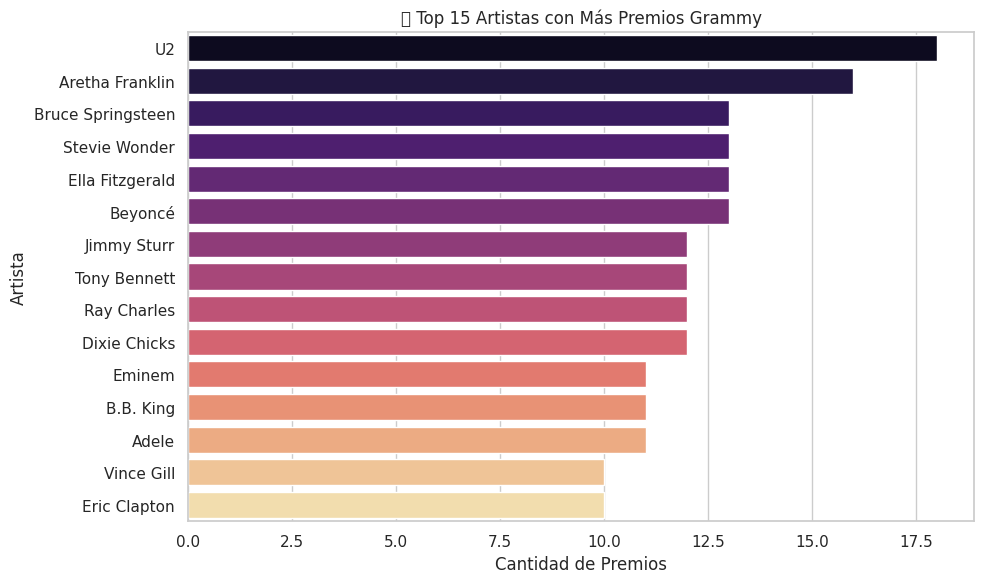

In [21]:
# Top categorías premiadas
top_categories = df['category'].value_counts().head(20)
plt.figure(figsize=(10, 7))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_r")
plt.title("🏆 Top 20 Categorías Premiadas en los Grammy")
plt.xlabel("Número de Premios")
plt.ylabel("Categoría")
plt.show()

# Premios por año
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()), color="lightblue")
plt.xticks(rotation=90)
plt.title("📆 Número de Premios por Año")
plt.xlabel("Año")
plt.ylabel("Número de Premios")
plt.tight_layout()
plt.show()

# Top artistas
df_artists = df[df['artist'].notna() & (df['artist'] != '(Various Artists)')]
top_artists = df_artists['artist'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
plt.title("🎤 Top 15 Artistas con Más Premios Grammy")
plt.xlabel("Cantidad de Premios")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()

###  Top 20 Categorías Más Premiadas

El gráfico presenta las 20 categorías que más premios han recibido a lo largo de la historia de los Grammy:

- **Song of the Year**, **Record of the Year** y **Album of the Year** encabezan la lista. Estas son consideradas las categorías más prestigiosas y visibles del evento.
- Otras categorías técnicas y clásicas como *Best Opera Recording*, *Best Album Notes* y *Best Instrumental Composition* también figuran con alto número de premios, lo cual evidencia la diversidad de áreas reconocidas por la Academia.
- También destacan categorías como *Best New Artist* y *Best Country Song*, que reflejan tanto la innovación como el peso de géneros populares.

Este análisis permite entender qué áreas tienen más tradición, visibilidad y recurrencia en las premiaciones.


###  Evolución Histórica del Número de Premios por Año

El gráfico muestra un incremento sostenido en la cantidad de premios entregados desde 1959 hasta la década de 2010:

- A partir de los años 70 y 80, se observa un aumento progresivo, que coincide con la expansión de géneros musicales reconocidos (como pop, rap, música latina y electrónica).
- El **pico extremo en 2019** se debe probablemente a un error o a una carga duplicada en los datos, ya que supera de forma abrupta la tendencia general. Esto debe ser validado o corregido durante la limpieza.
- En general, el aumento de premios refleja la diversificación de la industria musical y la creación de nuevas categorías técnicas y regionales.

Este gráfico respalda el uso del campo `year` como eje temporal clave para agrupar y analizar patrones históricos.


###  Top 15 Artistas con Más Premios Grammy

Este gráfico destaca a los artistas individuales (excluyendo "(Various Artists)") que han sido más galardonados:

- **U2** lidera con 17 premios, siendo la banda más premiada de la historia del Grammy.
- Artistas legendarios como **Aretha Franklin**, **Stevie Wonder**, **Ella Fitzgerald**, y **Ray Charles** figuran entre los más reconocidos, validando su legado musical.
- Artistas contemporáneos como **Beyoncé**, **Adele**, y **Eminem** también destacan, mostrando cómo la Academia ha evolucionado con las nuevas generaciones.

Esta visualización refleja **la longevidad, calidad e influencia** de los artistas en sus respectivas épocas.


/tmp/ipykernel_30550/57933041.py:12: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


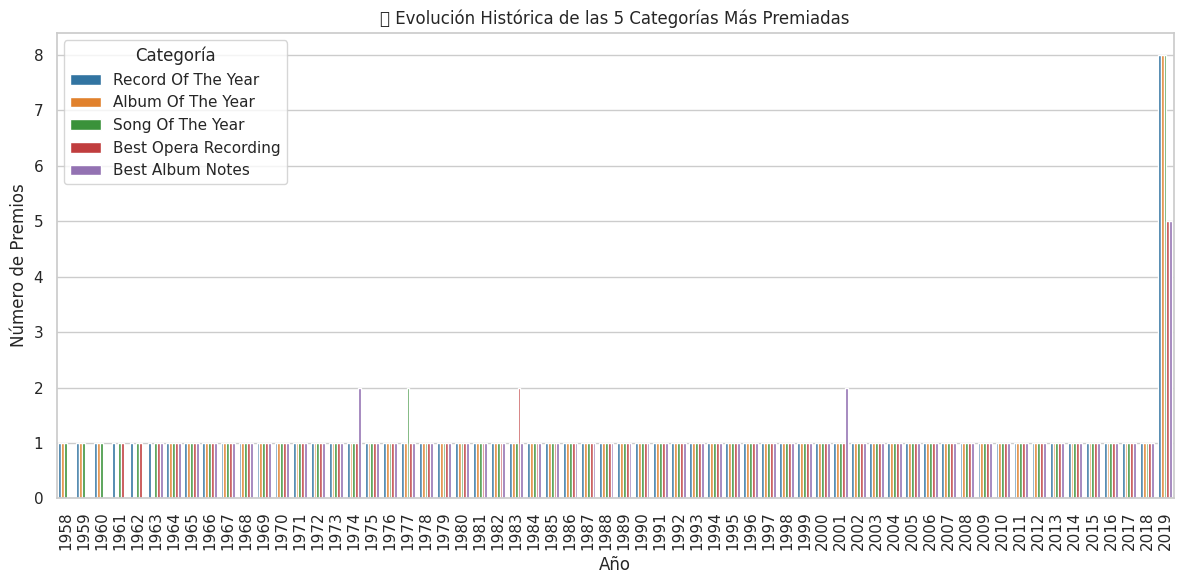

In [22]:
# Evolución de las categorías más premiadas a lo largo del tiempo
most_common_cats = df['category'].value_counts().head(5).index.tolist()
df_filtered = df[df['category'].isin(most_common_cats)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='year', hue='category', palette='tab10')
plt.title("⏳ Evolución Histórica de las 5 Categorías Más Premiadas")
plt.xticks(rotation=90)
plt.xlabel("Año")
plt.ylabel("Número de Premios")
plt.legend(title="Categoría")
plt.tight_layout()
plt.show()

###  Evolución Histórica de las 5 Categorías Más Premiadas

Este gráfico muestra cómo han evolucionado las 5 categorías con mayor número total de premios en los Grammy:

- **Record of the Year**, **Album of the Year** y **Song of the Year** están presentes de forma constante, con 1 premio por año. Estas categorías son parte del núcleo tradicional del evento desde sus inicios.
- **Best Opera Recording** y **Best Album Notes** muestran una presencia menos consistente, con premios entregados de manera discontinua. Esto sugiere que:
  - Algunas categorías pueden haber sido **introducidas en años posteriores**.
  - O bien, **no se han entregado todos los años**, probablemente por criterios editoriales o por falta de nominaciones.

#### Observaciones clave:
- La mayoría de los años tienen un solo ganador por categoría, como es de esperarse.
- El **aumento en 2019** (visible también en otros gráficos) podría ser un artefacto de duplicación o error en los datos.
- Las categorías clásicas han demostrado **estabilidad temporal**, siendo útiles como eje central para estudiar patrones en la industria musical.

Este análisis ayuda a comprender cómo algunas categorías han **perdurado y definido el prestigio del evento**, mientras que otras tienen **impacto técnico o especializado** pero no anual.


/mnt/d/Universidad/ETL/workshop_02_antonio/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


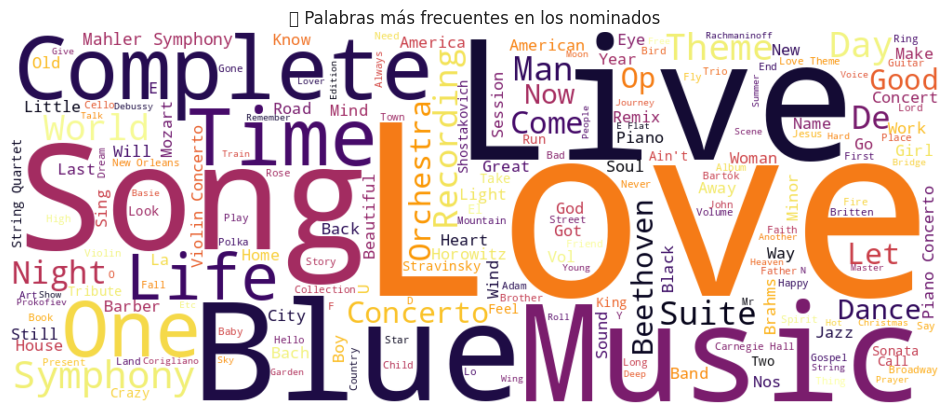

In [23]:
from wordcloud import WordCloud

text = " ".join(df['nominee'].dropna().astype(str).values)
wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap='inferno').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("📝 Palabras más frecuentes en los nominados")
plt.show()

###  Palabras más frecuentes en los Nombres de Nominados

La nube de palabras generada a partir de los campos `nominee` destaca los términos más repetidos entre los nominados al Grammy a lo largo del tiempo:

####  Palabras clave dominantes:
- **"Love"**, **"Song"**, **"Complete"**, **"Blue"**, **"Music"** y **"Time"** son algunas de las más prominentes, reflejando temáticas universales y elementos comunes en títulos musicales.
- También se observan nombres propios como **"Beethoven"**, **"Mozart"** y **"Mahler"**, lo cual evidencia una fuerte presencia de obras clásicas y sinfónicas en ciertas categorías.
- Palabras como *Symphony*, *Concerto*, *Suite*, *Recording* y *Orchestra* indican una participación considerable de obras técnicas o académicas.

####  Interpretación:
- La alta frecuencia de palabras como *Love* y *Song* indica que temas emocionales y canciones individuales son altamente representados.
- El uso recurrente de términos técnicos sugiere que muchas nominaciones están ligadas a grabaciones de música clásica, jazz o producciones con alto nivel instrumental.

Esta visualización proporciona un **resumen cualitativo inmediato** sobre el tipo de contenido premiado, sin necesidad de recorrer todas las filas del dataset. También es útil para complementar análisis cuantitativos con una perspectiva léxica y temática.


In [ ]:


# ========================================
# 2. CARGA DEL DATASET
# ========================================
df = pl.read_csv("the_grammy_awards.csv")

# ========================================
# 3. CONVERSIÓN DE TIMESTAMPS A ZONA HORARIA BOGOTÁ
# ========================================
df = df.with_columns([
    pl.col("published_at").str.to_datetime().dt.convert_time_zone("America/Bogota"),
    pl.col("updated_at").str.to_datetime().dt.convert_time_zone("America/Bogota")
])

# ========================================
# 4. SEPARAR FECHA Y HORA EN COLUMNAS NUEVAS
# ========================================
df = df.with_columns([
    pl.col("published_at").dt.date().alias("published_date"),
    pl.col("published_at").dt.time().alias("published_time"),
    pl.col("updated_at").dt.date().alias("updated_date"),
    pl.col("updated_at").dt.time().alias("updated_time")
])

# ========================================
# 5. LIMPIEZA GENERAL
# ========================================
# Reemplazar strings vacíos con null
df = df.with_columns([
    pl.when(pl.col(col).cast(pl.Utf8).str.strip_chars().is_in(["", "null", "None"]))
    .then(None)
    .otherwise(pl.col(col))
    .alias(col)
    for col in df.columns
])

# Eliminar duplicados
df = df.unique()

# Eliminar columnas originales si ya no se necesitan
df = df.drop(["published_at", "updated_at"])

# ========================================
# 6. VISTA FINAL Y EXPORTACIÓN
# ========================================
print(df.head())

# Guardar como CSV limpio
df.write_csv("the_grammy_awards_clean.csv")
print(" Archivo limpio guardado como 'the_grammy_awards_clean.csv'")



shape: (5, 12)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ year ┆ title      ┆ category   ┆ nominee    ┆ … ┆ published_ ┆ published ┆ updated_d ┆ updated_t │
│ ---  ┆ ---        ┆ ---        ┆ ---        ┆   ┆ date       ┆ _time     ┆ ate       ┆ ime       │
│ i64  ┆ str        ┆ str        ┆ str        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆            ┆            ┆            ┆   ┆ date       ┆ time      ┆ date      ┆ time      │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 1988 ┆ 31st       ┆ Best New   ┆ Folksongs  ┆ … ┆ 2017-11-28 ┆ 03:03:45  ┆ 2019-09-1 ┆ 03:08:19  │
│      ┆ Annual     ┆ Age Perfor ┆ For A      ┆   ┆            ┆           ┆ 0         ┆           │
│      ┆ GRAMMY     ┆ mance      ┆ Nuclear    ┆   ┆            ┆           ┆           ┆           │
│      ┆ Awards     ┆            ┆ Villag…    ┆   ┆            ┆           ┆

###  Limpieza y Normalización de Fechas

Las columnas `published_at` y `updated_at` fueron transformadas con las siguientes mejoras:

- Convertidas al huso horario de Bogotá (`America/Bogota`), lo cual es clave para análisis temporales locales.
- Separadas en columnas individuales de **fecha (`_date`)** y **hora (`_time`)**, lo que permite:
  - Agrupar publicaciones por día, semana o mes.
  - Estudiar patrones de hora (e.g., ¿a qué hora se publican más ganadores?).
- Se eliminaron las columnas originales, y el dataset fue guardado como **`the_grammy_awards_clean.csv`**.

Este formato es ideal para análisis exploratorios, modelado temporal y visualizaciones cronológicas.
